In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../data/gurgaon_properties_outlier_treated.csv')

In [11]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,raheja navodaya,sector 92,0.62,4806.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,1498.0,1064.0,0,0,0,0,0,0,0,645.0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,5350.0,NaN,0,0,0,0,0,0,63,1337.5
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,634.0,0,0,0,0,0,2,97,317.0
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,2500.0,2250.0,0,1,0,0,0,1,49,703.0
4,flat,m3m heights,sector 65,1.99,15794.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,NaN,NaN,0,0,0,0,0,0,48,630.0


In [12]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1073
agePossession             0
super_built_up_area    1765
built_up_area          2053
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

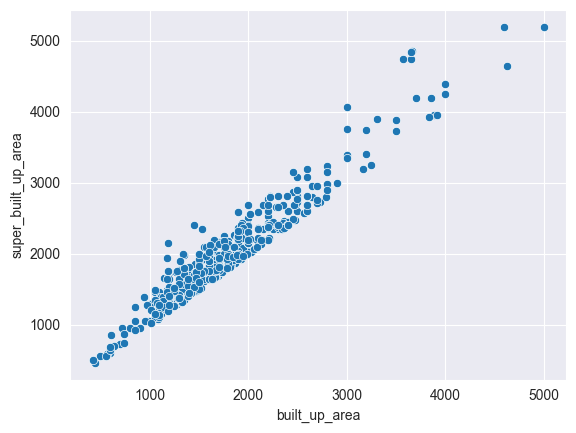

In [13]:
sns.scatterplot(x = df['built_up_area'], y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

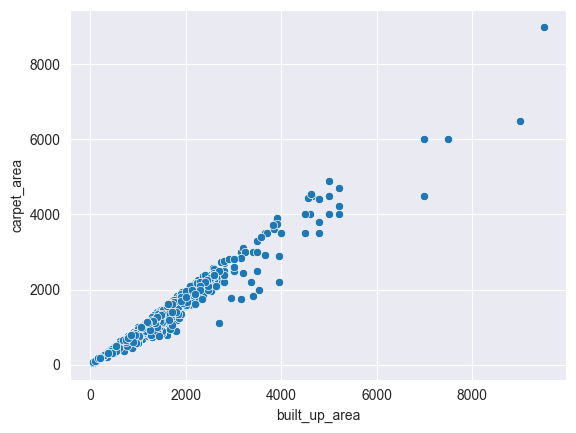

In [14]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])

In [16]:
((df['super_built_up_area'].isnull()) & (df['carpet_area'].isnull()) & (df['built_up_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3676    False
3677    False
3678    False
3679    False
3680    False
Length: 3681, dtype: bool

In [17]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['carpet_area'].isnull()) | (df['built_up_area'].isnull()))]

In [18]:
all_present_df.shape

(534, 24)

In [19]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [20]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [21]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [22]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [23]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
17,flat,orris carnation residency,sector 85,1.10,6687.0,1645.0,Super Built up area 1645(152.83 sq.m.)Carpet a...,3,4,3,...,NaN,1300.0,0,1,0,0,0,2,65,548.333333
25,flat,shree vardhman victoria,sector 70,1.65,8462.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,NaN,1161.0,0,1,0,0,1,1,49,650.000000
28,flat,imperia the esfera,sector 37c,0.85,5387.0,1578.0,Super Built up area 1578(146.6 sq.m.)Carpet ar...,2,3,3,...,NaN,1310.0,1,0,0,0,0,0,49,789.000000
51,flat,ambience creacions,sector 22,2.79,15000.0,1860.0,Super Built up area 1860(172.8 sq.m.)Carpet ar...,3,3,3,...,NaN,1300.0,0,0,0,0,0,2,158,620.000000
52,flat,godrej air,sector 85,1.30,14541.0,894.0,Super Built up area 1400(130.06 sq.m.)Carpet a...,2,2,3,...,NaN,894.0,0,0,0,0,0,0,111,447.000000


In [24]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\748114042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\748114042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [25]:
df.update(sbc_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1073
agePossession             0
super_built_up_area    1765
built_up_area          1625
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [27]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [28]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,m3m heights,sector 65,1.99,15794.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,NaN,NaN,0,0,0,0,0,0,48,630.000000
8,flat,godrej oasis,sector 88a,1.50,8108.0,1850.0,Super Built up area 1850(171.87 sq.m.),3,3,3+,...,NaN,NaN,0,0,0,0,0,0,39,616.666667
9,flat,mahindra luminare,sector 59,5.50,18182.0,3025.0,Super Built up area 3025(281.03 sq.m.),3,3,1,...,NaN,NaN,0,1,0,0,0,0,24,1008.333333
11,flat,conscient heritage max,sector 102,2.20,10237.0,2149.0,Super Built up area 2149(199.65 sq.m.),3,4,3+,...,NaN,NaN,1,1,0,0,0,0,125,716.333333
12,flat,bestech park view grand spa,sector 81,2.22,8346.0,2660.0,Super Built up area 2660(247.12 sq.m.),3,4,3+,...,NaN,NaN,0,1,0,0,0,1,174,886.666667


In [29]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\1200380189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\1200380189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(r

In [30]:
df.update(sb_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1073
agePossession             0
super_built_up_area    1765
built_up_area           721
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [32]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [33]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,634.0,0,0,0,0,0,2,97,317.000000
6,flat,hcbs sports ville,sohna road,0.24,7407.0,324.0,Carpet area: 324 (30.1 sq.m.),1,1,2,...,NaN,324.0,0,0,0,0,0,0,68,324.000000
13,flat,signature global park,sohna road,0.52,6326.0,822.0,Carpet area: 822 (76.37 sq.m.),2,2,2,...,NaN,822.0,0,0,0,1,0,0,161,411.000000
16,house,bptp astaire gardens,sector 70a,1.04,7172.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,...,NaN,1450.0,0,0,0,0,1,1,145,483.333333
19,flat,ansal api sushant estate,sector 52,0.29,11600.0,250.0,Carpet area: 250 (23.23 sq.m.),1,1,0,...,NaN,250.0,0,0,0,0,0,1,49,250.000000


In [34]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\2782782977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\2782782977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['ca

In [35]:
df.update(c_df)

In [36]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1073
agePossession             0
super_built_up_area    1765
built_up_area             0
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

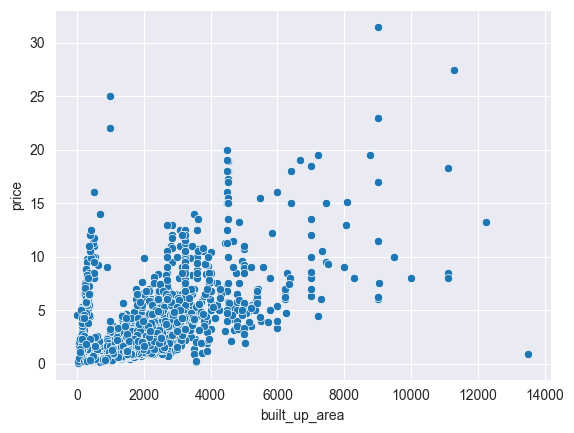

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
anomaly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [39]:
anomaly_df.sample(5)

,price,area,built_up_area
1641,9.85,3323.0,418.0
618,2.75,1975.0,1750.0
806,4.35,1350.0,1350.0
3167,3.60,1836.0,1836.0
1136,4.70,2368.0,170.0


In [40]:
anomaly_df['built_up_area'] = anomaly_df['area']

In [41]:
df.update(anomaly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

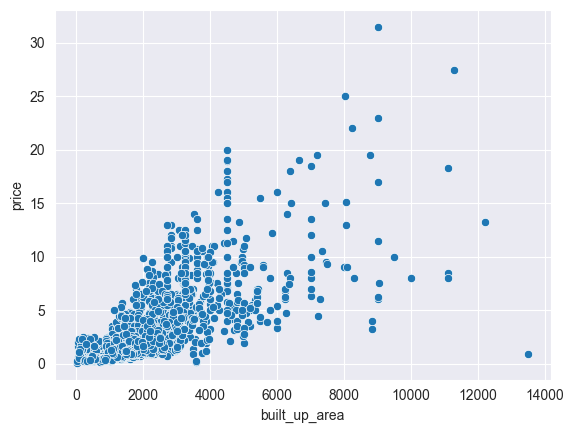

In [42]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [43]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4806.0,2,2,2,5.0,NaN,New Property,1498.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,4,4,3+,0.0,NaN,Moderately Old,5350.0,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,2,2,1,11.0,East,New Property,704.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,4,4,3+,4.0,North-East,Relatively New,2500.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15794.0,2,2,2,26.0,NaN,Undefined,1140.0,0,0,0,0,0,0,48


In [45]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1073
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [46]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
120,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
174,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
484,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
798,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
1420,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1653,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
2081,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
2242,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
2251,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
2557,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59


In [47]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [48]:
df['floorNum'].fillna(2.0, inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_24832\1880809499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace=True)


In [49]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1073
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [50]:
1073/df.shape[0]

0.29149687584895406

<Axes: ylabel='count'>

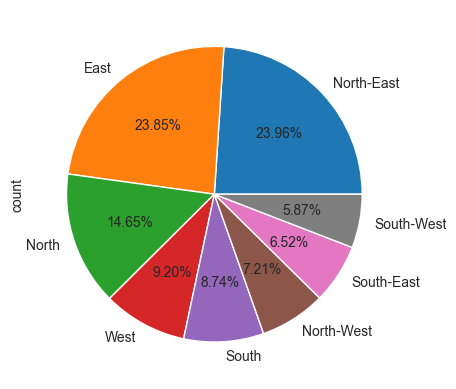

In [51]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [52]:
df.drop(columns=['facing'],inplace=True)

In [53]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1366,house,international city by sobha phase 1,sector 109,6.00,9634.0,5,5,3+,2.0,Relatively New,6228.0,1,1,1,1,0,0,160
1897,flat,paras quartier,gwal pahari,5.90,11028.0,4,4,3+,19.0,New Property,4842.0,1,1,1,1,0,1,160
1006,flat,emaar mgf palm hills,sector 77,1.08,5400.0,3,4,3+,5.0,Relatively New,1810.0,1,1,0,0,1,1,167
2477,flat,supertech hues,sector 68,0.80,6780.0,2,2,3+,14.0,New Property,1180.0,0,0,0,0,0,1,26
716,flat,ss the leaf,sector 85,1.20,7317.0,2,2,3,6.0,Relatively New,1300.0,0,0,0,0,0,1,174


In [54]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [55]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1653,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [56]:
df.drop(index=1653, inplace=True)

In [57]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [58]:
df['agePossession'].value_counts()

agePossession
Relatively New        1634
New Property           590
Moderately Old         555
Undefined              470
Old Property           301
Under Construction     130
Name: count, dtype: int64

In [59]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,flat,m3m heights,sector 65,1.99,15794.0,2,2,2,26.0,Undefined,1140.0,0,0,0,0,0,0,48
9,flat,mahindra luminare,sector 59,5.50,18182.0,3,3,1,26.0,Undefined,2738.0,0,1,0,0,0,0,24
10,flat,godrej habitat,sector 3,1.35,12784.0,2,2,0,4.0,Undefined,1056.0,0,0,0,0,0,0,60
29,flat,dnha cghs,sector 1,0.85,3864.0,3,3,0,5.0,Undefined,2200.0,0,0,0,0,0,0,0
36,flat,chd avenue,sector 71,0.95,7917.0,2,2,0,5.0,Undefined,1200.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,house,independent,sector 55,2.80,18667.0,4,4,0,2.0,Undefined,1500.0,0,0,0,0,0,0,0
3666,house,independent,sector 8,0.45,9000.0,1,1,1,3.0,Undefined,556.0,0,0,0,0,0,0,0
3670,house,independent,sector 17,3.00,11111.0,4,4,0,1.0,Undefined,3000.0,0,0,0,0,0,0,0
3677,flat,godrej nature plus,sector 33,1.08,13123.0,2,2,3,8.0,Undefined,85.0,0,0,0,0,0,0,56


In [60]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1832
New Property           673
Moderately Old         602
Old Property           338
Under Construction     132
Undefined              103
Name: count, dtype: int64

In [63]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1848
New Property           702
Moderately Old         609
Old Property           352
Under Construction     132
Undefined               37
Name: count, dtype: int64

In [66]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1862
New Property           702
Moderately Old         632
Old Property           352
Under Construction     132
Name: count, dtype: int64

In [69]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [70]:
df.to_csv('../data/gurgaon_properties_missing_value_imputation.csv',index=False)

In [71]:
df.shape

(3680, 18)